# ***GRIP: The Spark Foundation***

---


**Data Science and Bussiness Analytics Internship**

Author: Praveen Kumar Sharma

**Task 1 : Prediction Using Supervised ML**

In this task, we have to predict the percentage of a student based on the no. of hours studied by the student. We can classify this task as simple linear regression as it only has two variables namely No. of hours studied and Percentage Score.

In [ ]:
# Importing necessory Pyton Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing and reading the Data set
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

**Exploring the Data**

In [ ]:
# data.shape will give us the rows and columns present in the data set
print (data.shape)
# By giving condition as 10, the first 10 values of data set will be displayed
data.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Describe function will display parameters of the data like total count, mean, std, min, max, etc.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Data Analysis and Visualization**

Text(0, 0.5, 'Percentage Score')

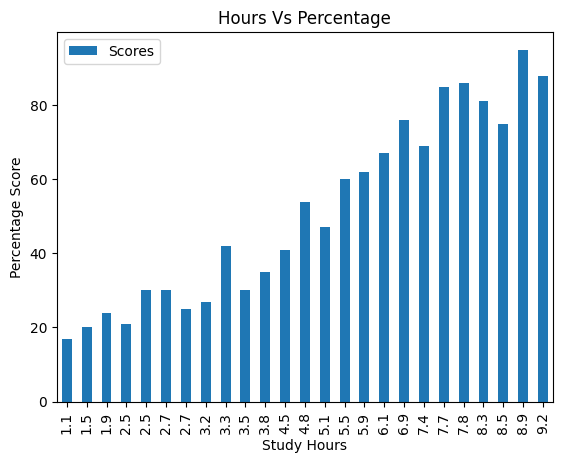

In [ ]:
# Visualizing the data into bar graph showing data in ascending values
data.sort_values(["Hours"], axis=0, ascending=[True], inplace=True)
data.head(10)
data.plot(kind='bar', x='Hours', y='Scores')
plt.title("Hours Vs Percentage")
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')

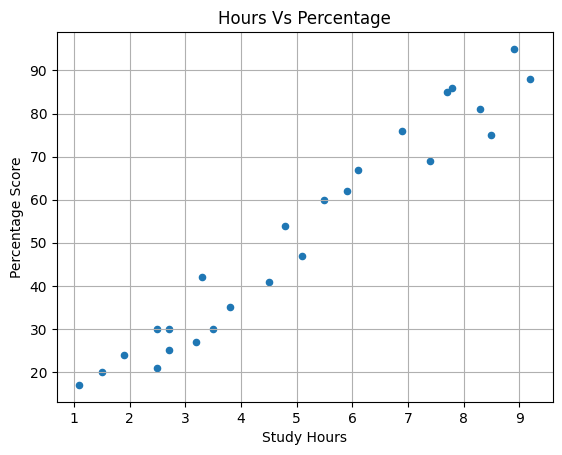

In [ ]:
data.plot.scatter(x='Hours',y='Scores', style='o')
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.title("Hours Vs Percentage")
plt.grid()
plt.show()

In [ ]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Linear Regression**

In [ ]:
# Defining x and y from the Data
x = data.iloc[:, :-1].values
y =  data.iloc[:, 1].values

In [ ]:
# Divinding the Dataset int Test Dataset and Train Dataset
# Test size given as 0.2. This means 20% of dataset will go for testing while 80% of dataset will go for training 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

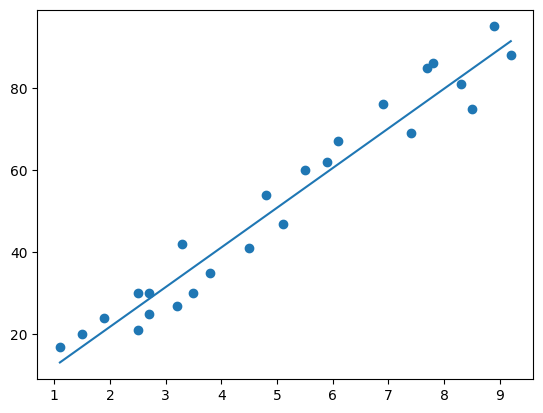

In [ ]:
# Visualizing and comparing our data with liner path
m = reg.coef_
c = reg.intercept_
line = m*x+c
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
#Testing our model
print(x_test)
print(("Predicting our score"))
y_pred = reg.predict(x_test)
print(y_pred)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]
Predicting our score
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [ ]:
#Checkiing accuracy of our Model
df = pd.DataFrame({'Target':y_test, 'Predicted':y_pred})
df

,Target,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


**What will be the predicted score of a student if he/she studies for 9.25 hrs/day?**

In [ ]:
hours = [[9.5]]
pred = reg.predict(hours)
print(pred)

[94.32000434]


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 94.32 marks.**

In [ ]:
#Evaluating our Model by checking for mean error produced
from sklearn import metrics
from sklearn.metrics import r2_score 
print("Mean Error produced is: ",
      metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score is: ", r2_score(y_test, y_pred))

Mean Error produced is:  4.621333622532767
R2 Score is:  0.9503831741928792


In [ ]:
# Again Training or Algorithm to check mean error for Random Forest 
from  sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
reg= RandomForestRegressor(n_estimators = 1000,random_state= 42)
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Finally, testing our model 
print(x_test)
print("Predection of Score")
y_pred = reg.predict(x_test)
print(y_pred)

[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]
Predection of Score
[25.2673  21.74895 81.476   62.308   50.121  ]


In [ ]:
#Checkiing accuracy of our Model
df = pd.DataFrame({'Target':y_test, 'Predicted':y_pred})
df

,Target,Predicted
0,30,25.26730
1,24,21.74895
2,85,81.47600
3,67,62.30800
4,41,50.12100


In [ ]:
hours = [[9.5]]
pred = reg.predict(hours)
print(pred)

[88.332]


In [ ]:
# Evaluating the Model
from sklearn import metrics
print('Mean Absolute Error:',
 metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score is: ", r2_score(y_test, y_pred))

Mean Absolute Error: 4.864150000000003
R2 Score is:  0.945642231233141


**Small value of Mean absolute error illustrates that the chances of error or wrong forecasting through the model are very less.**

# ***Thank You!***